## Methods
Since I am only interested in computing the themes with the most sets, I will need to use tables that contain information on movies total gross and disney director. This implies that I will need to use the **disney_movies_total_gross** and the **disney_director** tables.

However, before moving further, let us import the tables and do some basic visualizations.

![method](../method.png)

In [52]:
# Lets import all the required libraries needed for this analysis
import altair as alt
import pandas as pd
import numpy as np
# import all the required files
total_gross = pd.read_csv("data/disney_movies_total_gross.csv")
movie_director = pd.read_csv("data/disney-director.csv")


Lets see what the tables look like.

In [53]:
total_gross.head()

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,"Dec 21, 1937",Musical,G,"$184,925,485","$5,228,953,251"
1,Pinocchio,"Feb 9, 1940",Adventure,G,"$84,300,000","$2,188,229,052"
2,Fantasia,"Nov 13, 1940",Musical,G,"$83,320,000","$2,187,090,808"
3,Song of the South,"Nov 12, 1946",Adventure,G,"$65,000,000","$1,078,510,579"
4,Cinderella,"Feb 15, 1950",Drama,G,"$85,000,000","$920,608,730"


In [54]:
movie_director.head()

,name,director
0,Snow White and the Seven Dwarfs,David Hand
1,Pinocchio,Ben Sharpsteen
2,Fantasia,full credits
3,Dumbo,Ben Sharpsteen
4,Bambi,David Hand


# Lets find the way to calculate the Gross: Average and Total
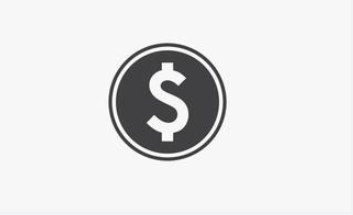![method](../dollar.png)

### Total Gross Math Equation 

\begin{alignedat}{2}y&\,=\,&x_1+x_2+\cdot\cdot\cdot+x_n\end{alignedat}

### Average Gross Math Equation 
$$
\begin{aligned}
\bar{y}&=\frac{1}{n} \left(\sum_{i=1}^n x_i \right) 
\end{aligned}
$$


Lets get some other information about the sets table.

In [55]:
total_gross.info()
print(total_gross['total_gross'].dtype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   MPAA_rating               523 non-null    object
 4   total_gross               579 non-null    object
 5   inflation_adjusted_gross  579 non-null    object
dtypes: object(6)
memory usage: 27.3+ KB
object


The sets table has $579$ rows and $6$ columns. Every **movie_title** has a **release_Date**, a **total_gross**, the **inflation_adjusted_gross**. 

Lets get some other information about the **movie_director** table.

In [56]:
movie_director.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      56 non-null     object
 1   director  56 non-null     object
dtypes: object(2)
memory usage: 1.0+ KB


The **movie_director** table has $56$ rows with $2$ columns. Every movie name has an **director**. 

As a first visualization, lets look at the average inflation adjusted gross in each genre. To do this, I will merge table **movie_director** with **total_gross** as **direct_gross**. 

In [57]:
direct_gross=total_gross.merge(movie_director, left_on='movie_title', right_on='name', how='left', indicator=True)
direct_gross

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross,name,director,_merge
0,Snow White and the Seven Dwarfs,"Dec 21, 1937",Musical,G,"$184,925,485","$5,228,953,251",Snow White and the Seven Dwarfs,David Hand,both
1,Pinocchio,"Feb 9, 1940",Adventure,G,"$84,300,000","$2,188,229,052",Pinocchio,Ben Sharpsteen,both
2,Fantasia,"Nov 13, 1940",Musical,G,"$83,320,000","$2,187,090,808",Fantasia,full credits,both
3,Song of the South,"Nov 12, 1946",Adventure,G,"$65,000,000","$1,078,510,579",NaN,NaN,left_only
4,Cinderella,"Feb 15, 1950",Drama,G,"$85,000,000","$920,608,730",Cinderella,Wilfred Jackson,both
...,...,...,...,...,...,...,...,...,...
574,The Light Between Oceans,"Sep 2, 2016",Drama,PG-13,"$12,545,979","$12,545,979",NaN,NaN,left_only
575,Queen of Katwe,"Sep 23, 2016",Drama,PG,"$8,874,389","$8,874,389",NaN,NaN,left_only
576,Doctor Strange,"Nov 4, 2016",Adventure,PG-13,"$232,532,923","$232,532,923",NaN,NaN,left_only
577,Moana,"Nov 23, 2016",Adventure,PG,"$246,082,029","$246,082,029",Moana,Ron Clements,both


After that I will use the **total_gross** table. I will group by director and then compute the average inflation adjusted gross for each director.

In [58]:
#get year from releasae date, and add year column back to the dataset total_gross
# group by year and compute the average inflation adjusted gross.

#total_gross['year'] = pd.DatetimeIndex(total_gross['release_date']).year
#total_gross=total_gross.assign(year = pd.DatetimeIndex(total_gross['release_date']).year)

direct_gross['inflation_adjusted_gross'] =direct_gross['inflation_adjusted_gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)
avg_inflation_gross_by_director = pd.DataFrame(direct_gross.groupby('director')['inflation_adjusted_gross'].mean().sort_values(ascending=False)).sort_values(by='director', ascending=True)
avg_inflation_gross_by_director =avg_inflation_gross_by_director.reset_index()
avg_inflation_gross_by_director.head()


,director,inflation_adjusted_gross
0,Art Stevens,1.331189e+08
1,Barry Cook,2.168078e+08
2,Ben Sharpsteen,2.188229e+09
3,Byron Howard,3.412682e+08
4,Chris Buck,3.494487e+08


Now that we have it in the proper format, we can generate a bar plot to visualize it.

In [59]:
# Use altair to generate a bar plot
Average_gross_plot = (
    alt.Chart(avg_inflation_gross_by_director, width=500, height=300)
    .mark_bar()
    .encode(
        x=alt.X("director:O", title="Director"),
        y=alt.Y("inflation_adjusted_gross:Q", title="Average inflation Adjusted Gross"),
    )
    .properties(title="Average of Adjusted Gross by Year")
)
Average_gross_plot

alt.Chart(...)

From the above plot we can see that David Hand has the highest average gross income (adjusted for inflation).  

As a second visualization, lets take a look at the number of movies of each director.. To do this, I need to count the movies by each director

In [60]:
# extract rows with out NAN values in the 'parent_id' column using the drop.na() function
# themes_with_parents = themes[themes['parent_id'].notnull()]
movies_with_director = direct_gross.dropna(subset=["director"])
movies_with_director

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross,name,director,_merge
0,Snow White and the Seven Dwarfs,"Dec 21, 1937",Musical,G,"$184,925,485",5.228953e+09,Snow White and the Seven Dwarfs,David Hand,both
1,Pinocchio,"Feb 9, 1940",Adventure,G,"$84,300,000",2.188229e+09,Pinocchio,Ben Sharpsteen,both
2,Fantasia,"Nov 13, 1940",Musical,G,"$83,320,000",2.187091e+09,Fantasia,full credits,both
4,Cinderella,"Feb 15, 1950",Drama,G,"$85,000,000",9.206087e+08,Cinderella,Wilfred Jackson,both
6,Lady and the Tramp,"Jun 22, 1955",Drama,G,"$93,600,000",1.236036e+09,Lady and the Tramp,Hamilton Luske,both
7,Sleeping Beauty,"Jan 29, 1959",Drama,NaN,"$9,464,608",2.150583e+07,Sleeping Beauty,Clyde Geronimi,both
8,101 Dalmatians,"Jan 25, 1961",Comedy,G,"$153,000,000",1.362871e+09,101 Dalmatians,Wolfgang Reitherman,both
12,The Sword in the Stone,"Dec 25, 1963",Adventure,NaN,"$22,182,353",1.538708e+08,The Sword in the Stone,Wolfgang Reitherman,both
13,The Jungle Book,"Oct 18, 1967",Musical,Not Rated,"$141,843,000",7.896123e+08,The Jungle Book,Wolfgang Reitherman,both
15,The Aristocats,"Apr 24, 1970",Musical,G,"$55,675,257",2.551615e+08,The Aristocats,Wolfgang Reitherman,both


Now lets group by genre and count the number of movies. to do this, I will import and use the script I created with a count function that takes in a dataframe and groups it by a certian column and then applies a specified aggreating function.

In [61]:
# import the custom script
import script as scpt

# run it on the data
movie_count = scpt.count_movie(movies_with_director, 'director','movie_title' )
movie_count

,director,count
0,Art Stevens,1
1,Barry Cook,1
2,Ben Sharpsteen,1
3,Byron Howard,1
4,Chris Buck,2
5,Chris Sanders,1
6,Chris Williams,1
7,Clyde Geronimi,2
8,David Hand,1
9,Don Hall,1


lets do a scatter plot of the themes with the most parents.

In [62]:
# first sort the counts and extract the top 20
top_5_movies = movie_count.sort_values(by=["count"], ascending=False)[
    :5
]

# now plot it using altair
top_5_genre_plot = (
    alt.Chart(top_5_movies, width=500, height=300)
    .mark_circle()
    .encode(
        x=alt.X("director:O", sort="y", title="Genre/Type"),
        y=alt.Y("count:Q", title="Number of Movies"),
    )
    .properties(title="Top 5 director made movies")
)
top_5_genre_plot

alt.Chart(...)